## [pyKNEEr](https://github.com/sbonaretti/pyKNEEr)

# [Segmenting MR Knee Images](https://sbonaretti.github.io/pyKNEEr/segmentation.html)
Content under Creative Commons Attribution license CC-BY-NC-SA 4.0   
Code under GNU-GPL v3 License  
© 2019 Serena Bonaretti
---

Segmentation is performed using an atlas-based algorithm. Given a segmented image (reference image), we use registration to segment each image (moving image) of the dataset. 

The segmentation consists of two parts:  
- Segment bone (used to initialize femoral cartilage segmentation)
- Segment cartilage

Each part is composed by 3 steps:  
- Step 1: *Register image to reference*. The moving image is registered to the reference image
- Step 2: *Invert transformation*. Transformations are inverted
- Step 3: *Warp reference mask to moving image*. Inverted transformations are applied to the mask of the reference image to obtain the mask of the moving image  

Registration, inversion, and warping are executed by calling *elastix*[1].

## Import packages

In [15]:
import sys
import importlib
sys.path.append(r'../../pykneer')
sys.path.append(r'../pykneer')
import pykneer_io as io
importlib.reload(io)
import preprocessing_for_nb as prep
importlib.reload(prep)
import segmentation_sa_for_nb as segm
importlib.reload(segm)

<module 'segmentation_sa_for_nb' from '../pykneer\\segmentation_sa_for_nb.py'>

## Image information

Inputs:   
- `input_file_name` contains the list of the images to be segmented  
- `modality` can be "newsubject", "longitudinal", or "multimodal"
- `n_of_cores` is the number of cores used for computations (computations are parallelized for speed)

In [2]:
input_file_name = "./image_list_newsubject.txt"
modality        = "newsubject" # use "newsubject", "longitudinal", or "multimodal" 
n_of_cores      = 1

#### Read image data
- `imageData` is a dictionary (or struct), where each cell corresponds to an image. For each image, information such as paths and file names are stored  

In [4]:
image_data = io.load_image_data_segmentation(modality, input_file_name)

-> image information loaded


In [5]:
image_data[0]

{'registration_type': 'newsubject',
 'vessel': 'fv',
 'cartilage': 'fc',
 'bone': 'f',
 'current_anatomy': [],
 'reference_folder': 'C:\\Zhixuan\\OAI-registration\\pyKNEEr-yg\\reference\\newsubject\\',
 'reference_name': 'reference.mha',
 'reference_root': 'reference',
 'moving_folder': 'C:\\Zhixuan\\OAI-registration\\pyKNEEr-yg\\preprocessed\\',
 'moving_name': '9189303L_TP0_prep.mha',
 'moving_root': '9189303L_TP0_prep',
 'registered_folder': 'C:\\Zhixuan\\OAI-registration\\pyKNEEr-yg\\registered\\',
 'segmented_folder': 'C:\\Zhixuan\\OAI-registration\\pyKNEEr-yg\\segmented\\',
 'registered_sub_folder': 'C:\\Zhixuan\\OAI-registration\\pyKNEEr-yg\\registered\\9189303L_TP0_prep\\',
 'i_registered_sub_folder': 'C:\\Zhixuan\\OAI-registration\\pyKNEEr-yg\\registered\\9189303L_TP0_prep\\invert\\',
 'dilate_radius': 15,
 'fmask_file_name': 'reference_f.mha',
 'fdil_mask_file_name': 'reference_f_15.mha',
 'flevelset_mask_file_name': 'reference_f_levelSet.mha',
 'fcmask_file_name': 'reference

## Reference image

The reference image is the number 9 of the current dataset. It was selected as a results of a convergence study described in the paper.
Here we check if femur mask and femur cartilage masks of the reference image are present

In [6]:
segm.prepare_reference(image_data)
### NOTE!!! reference_fv is dummy!!!

reference.mha
-> Reference preparation completed


## Segment bone

#### 1. Register image to reference

In [16]:
segm.register_bone_to_reference(image_data, n_of_cores)

-> Registration completed
-> The total time was 1.08 seconds (about 0 min)


#### 2. Invert transformations

In [17]:
segm.invert_bone_transformations(image_data, n_of_cores)

-> Inversion completed
-> The total time was 1.09 seconds (about 0 min)


#### 3. Warp reference mask to moving image

In [18]:
segm.warp_bone_mask(image_data, n_of_cores)

-> Warping completed
-> The total time was 21.70 seconds (about 0 min)


## Segment cartilage

#### 1. Register image to reference

In [19]:
segm.register_cartilage_to_reference(image_data, n_of_cores)

-> Registration completed
-> The total time was 60.21 seconds (about 1 min)


#### 2. Invert transformations

In [20]:
segm.invert_cartilage_transformations(image_data, n_of_cores)

-> Inversion completed
-> The total time was 78.12 seconds (about 1 min)


#### 3. Warp reference mask to moving image (optional)

In [21]:
segm.warp_cartilage_mask(image_data, n_of_cores)

-> Warping completed
-> The total time was 20.61 seconds (about 0 min)


## Visualize segmentations
Set the variable `view_modality` to `0` to show one slice of the image (static and faster rendering) or to `1` to scroll though the image (interactive and slower rendering). Note that when using interactive rendering, images might NOT be saved  for when reopening the notebook.

For each image (row), segmentation at medial, central, and lateral compartments

'Figure'

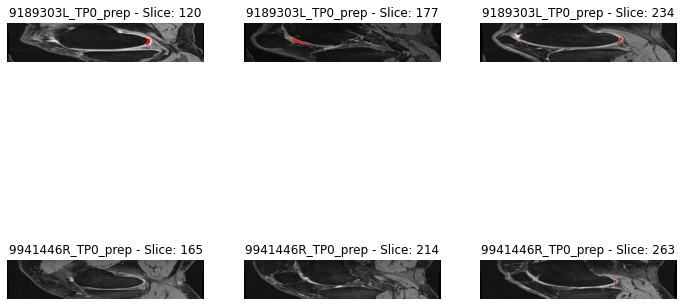

In [22]:
view_modality = 0; # 0 for static, 1 for interactive
fig = segm.show_segmented_images(image_data, view_modality)
display(fig)

### References

[1] Klein S., Staring M., Murphy K., Viergever M.A., Pluim J.P.W. [*elastix: A Toolbox for Intensity-Based Medical Image Registration*](http://elastix.isi.uu.nl/marius/downloads/2010_j_TMI.pdf) IEEE Transactions on Medical Imaging. vol. 29, no. 1, pp. 196 - 205, January. 2010. 

### Dependencies

In [13]:
%load_ext watermark
print ("elastix 4.8.0\n")
%watermark -v -m -p pykneer,SimpleITK,numpy,matplotlib,multiprocessing,ipywidgets,watermark
print (" ")
%watermark -u -n -t -z 

elastix 4.8.0

CPython 3.7.4
IPython 7.8.0

pykneer 0.0.5
SimpleITK 1.2.0rc2.dev1167+gd4cf2
numpy 1.19.1
matplotlib 3.1.1
multiprocessing unknown
ipywidgets 7.5.1
watermark 2.0.2

compiler   : MSC v.1915 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 79 Stepping 1, GenuineIntel
CPU cores  : 12
interpreter: 64bit
 
last updated: Fri Sep 18 2020 13:46:25 Pacific Daylight Time
